In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10, 6)

In [2]:
df = pd.read_csv("CardioGoodFitness.csv")

In [3]:
df.columns = map(lambda x: x.lower(), df.columns)

In [4]:
df.head()

,product,age,gender,education,maritalstatus,usage,fitness,income,miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product        180 non-null    object
 1   age            180 non-null    int64 
 2   gender         180 non-null    object
 3   education      180 non-null    int64 
 4   maritalstatus  180 non-null    object
 5   usage          180 non-null    int64 
 6   fitness        180 non-null    int64 
 7   income         180 non-null    int64 
 8   miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
df['product'] = df['product'].astype('category')
df['gender'] = df['gender'].astype('category')
df['maritalstatus'] = df['maritalstatus'].astype('category')

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


In [8]:
df.shape

(180, 9)

In [9]:
df.nunique()

product           3
age              32
gender            2
education         8
maritalstatus     2
usage             6
fitness           5
income           62
miles            37
dtype: int64

In [10]:
pd.crosstab(df['gender'], df['product'])

product,TM195,TM498,TM798
gender,,,
Female,40,29,7
Male,40,31,33


Observations

1. There are 180 observations
2. Age has an average of 28.7 years, however the median age is 26 years
3. Education has almost same mean and median which is around 15.5-16 years
4. The mean and median uage are respectively 3.4 and 3 days
5. The mean and average fitness are 3.3 and 3 respectively
6. The average and median income are around same
7. There are considerable difference of around 7 miles between mean and median miles
8. Males have purchased more treadmills than woman, however TM798 is not very popular among woman

# EDA

In [11]:
# check for missing value
pd.DataFrame(df.isnull().sum(), columns=['missing values'])

,missing values
product,0
age,0
gender,0
education,0
maritalstatus,0
usage,0
fitness,0
income,0
miles,0


In [12]:
df.duplicated().sum()

0

Oberstaion:

There are no missing values or duplicate in the data

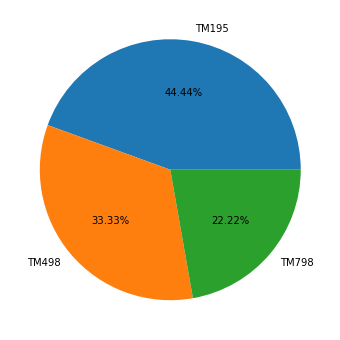

In [13]:
product_count = df['product'].value_counts()
plt.pie(product_count, labels=product_count.index, autopct='%1.2f%%')
plt.show()

In [14]:
pd.pivot_table(df, index=['product', 'gender'], columns=['maritalstatus'], aggfunc=len)

age        education          fitness           income  \
maritalstatus  Partnered Single Partnered Single Partnered Single Partnered   
product gender                                                                
TM195   Female        27     13        27     13        27     13        27   
        Male          21     19        21     19        21     19        21   
TM498   Female        15     14        15     14        15     14        15   
        Male          21     10        21     10        21     10        21   
TM798   Female         4      3         4      3         4      3         4   
        Male          19     14        19     14        19     14        19   

                          miles            usage         
maritalstatus  Single Partnered Single Partnered Single  
product gender                                           
TM195   Female     13        27     13        27     13  
        Male       19        21     19        21     19  
TM498   Female     14        15     14        15     14  
        Male       10        21     10        21     10  
TM798   Female      3         4      3         4      3  
        Male       14        19     14        19     14

In [15]:
pd.pivot_table(df, 'income', index=['product', 'gender'], columns=['maritalstatus'])

maritalstatus      Partnered        Single
product gender                            
TM195   Female  46153.777778  45742.384615
        Male    50028.000000  43265.842105
TM498   Female  49724.800000  48920.357143
        Male    49378.285714  47071.800000
TM798   Female  84972.250000  58516.000000
        Male    81431.368421  68216.428571

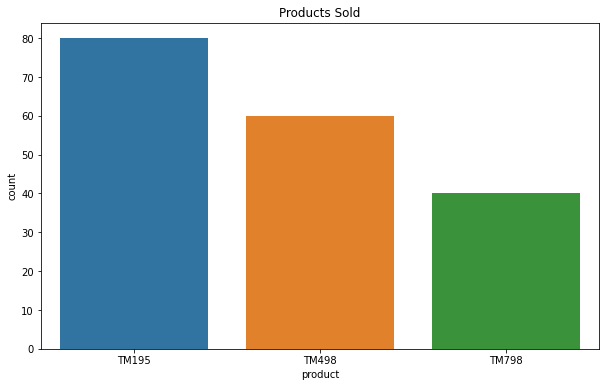

In [16]:
ax = sns.countplot(x='product', data=df)
ax.set_title('Products Sold')
plt.show()

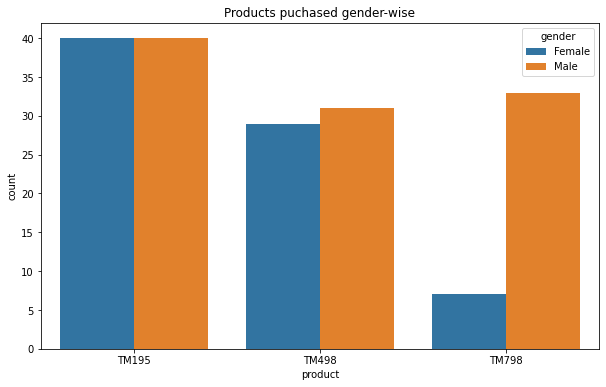

In [17]:
ax = sns.countplot(x='product', hue='gender', data=df)
ax.set_title('Products puchased gender-wise')
plt.show()

Observation

1. We can see the product TM 195 is the most popular among all
2. TM798 does not have much popularity among females

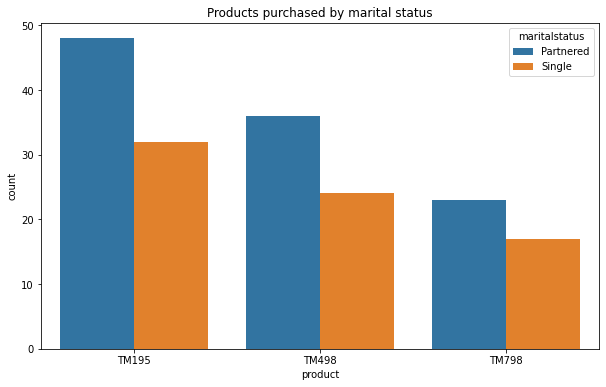

In [18]:

ax = sns.countplot(x='product', hue='maritalstatus', data=df)
ax.set_title("Products purchased by marital status")
plt.show()

Observation

We can see partnered people purchased more product than single ones in every product categories

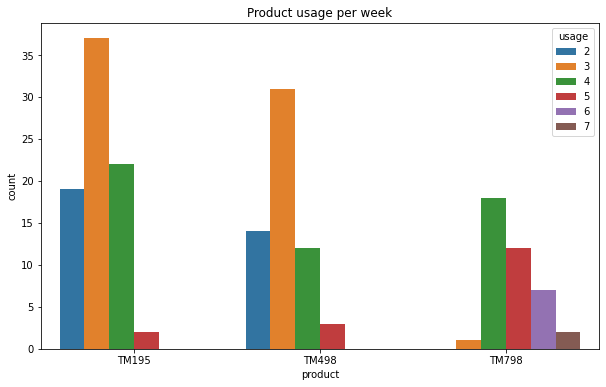

In [21]:
ax = sns.countplot(x='product', hue='usage', data=df)
ax.set_title("Product usage per week")
plt.show()

Observation

The first 2 products are mostly commonly used 3 days/week whereas the product TM798 is used more often

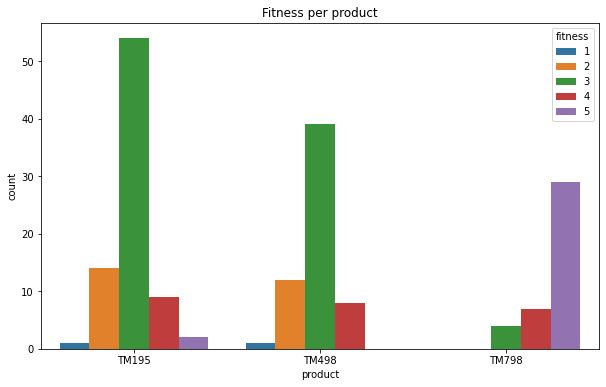

In [22]:
ax = sns.countplot(x='product', hue='fitness', data=df)
ax.set_title("Fitness per product")
plt.show()

Observation

It is observed that people using TM798 are having mostly better fitness

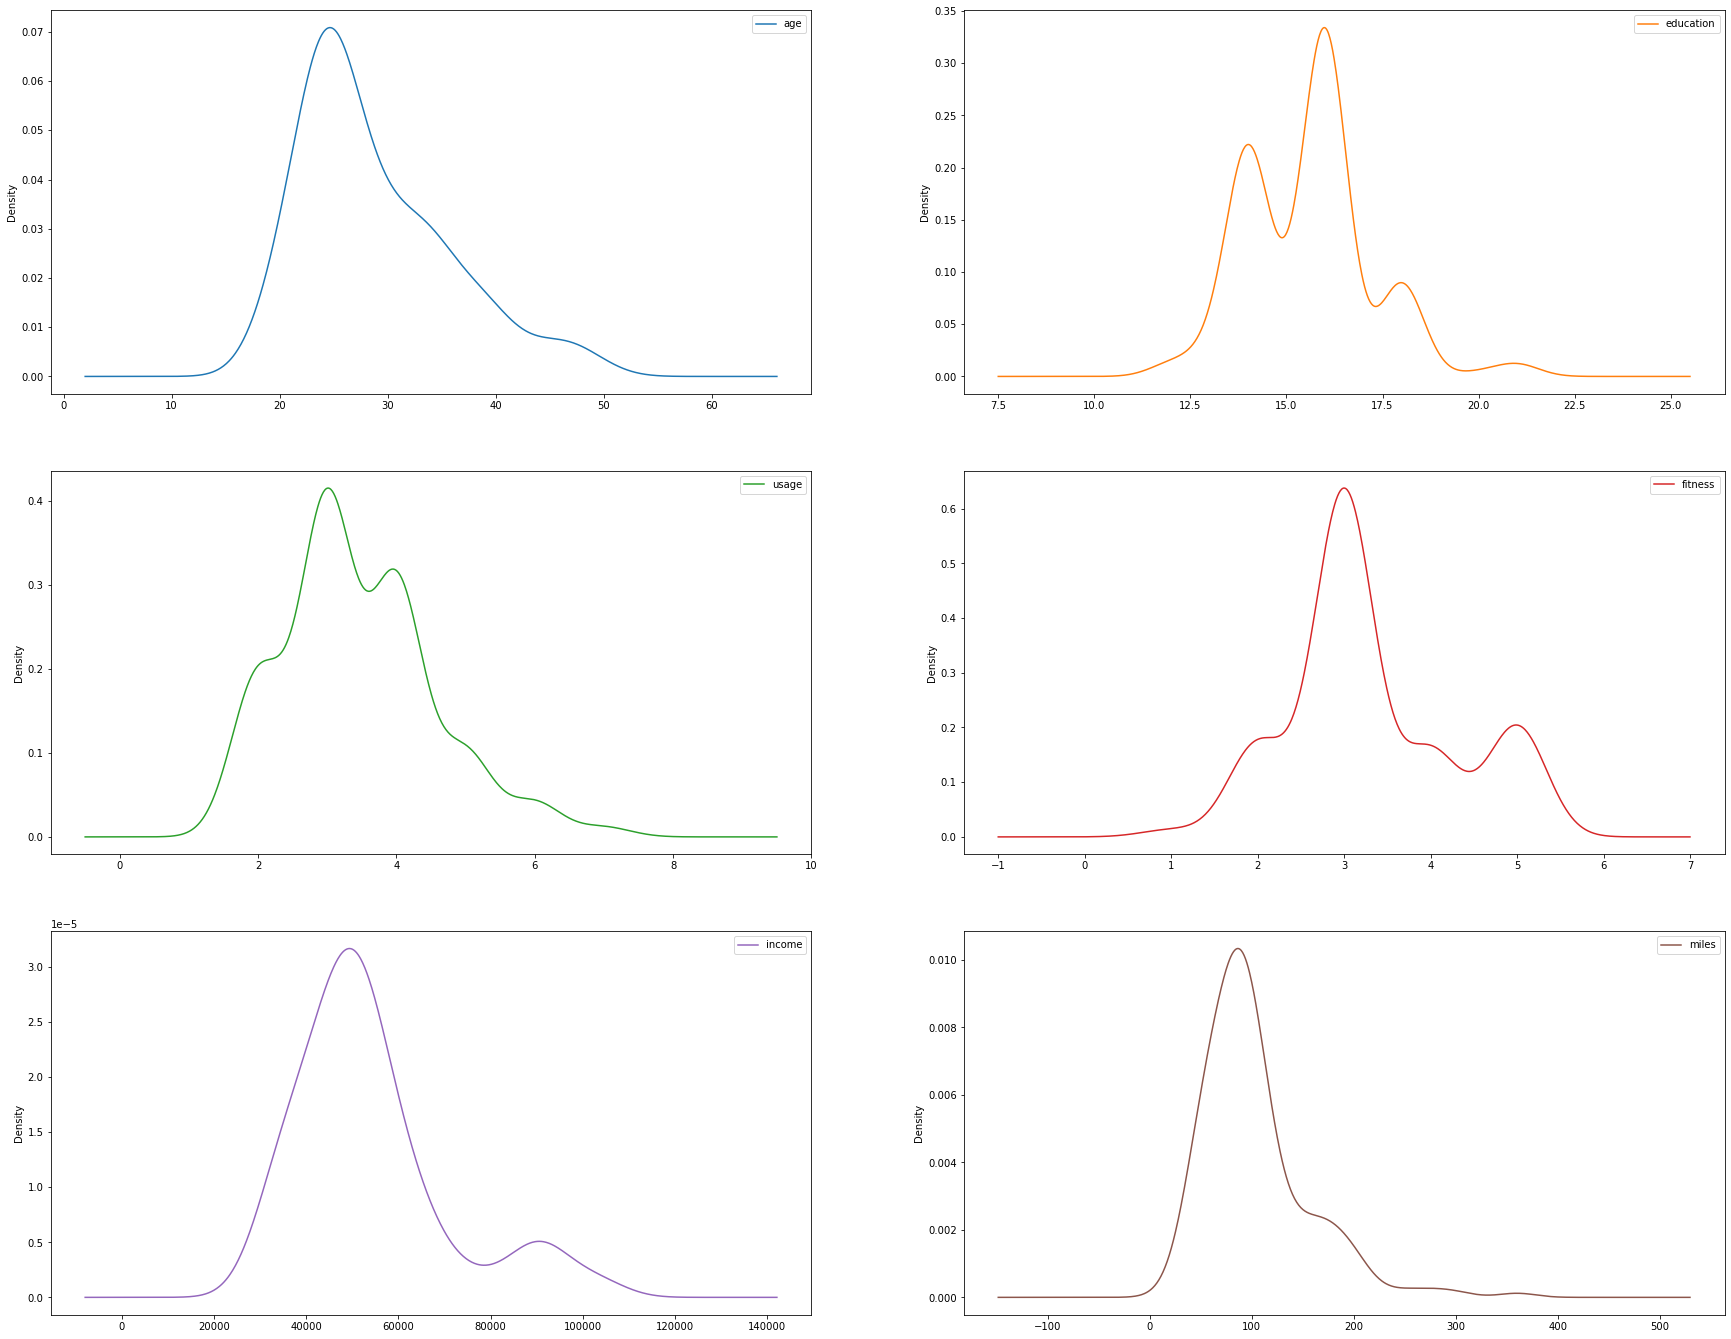

In [27]:
df.plot(kind='density', subplots=True, layout=(3,2), sharex=False, figsize=(30, 24))
plt.show()

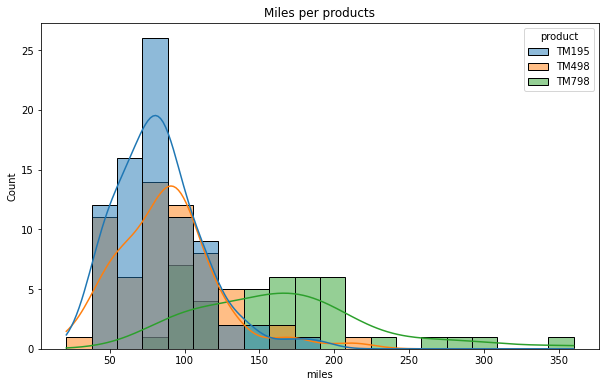

In [31]:
# histogram for miles expected to cover
ax = sns.histplot(data=df, x='miles', hue='product', kde=True)
ax.set_title("Miles per products")
plt.show()

Observation

1. People are mostly covering around 25 miles
2. TM798 is popular among people willing to cover more miles

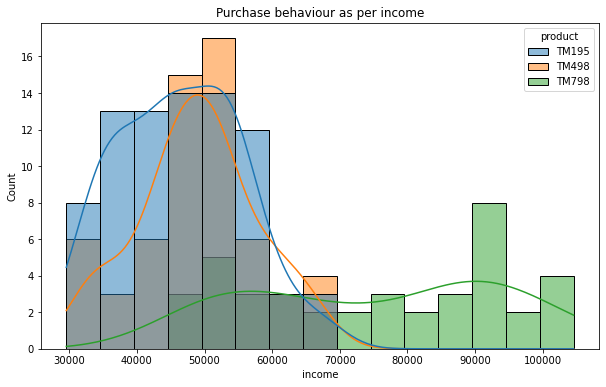

In [33]:
ax = sns.histplot(data=df, x='income', hue='product', kde=True)
ax.set_title("Purchase behaviour as per income")
plt.show()

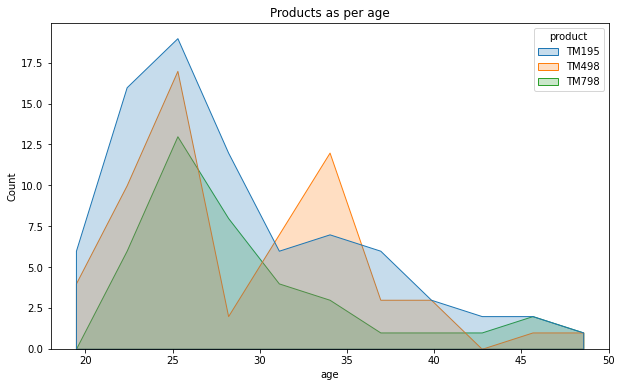

In [37]:
ax = sns.histplot(data=df, x='age', hue='product', element='poly')
ax.set_title("Products as per age")
plt.show()

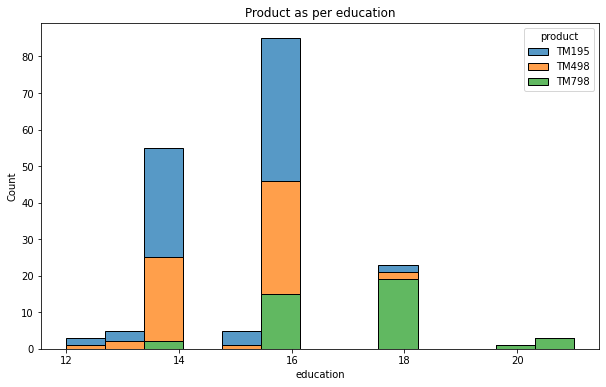

In [38]:
ax = sns.histplot(data=df, x="education", hue="product", multiple="stack")
ax.set_title("Product as per education")
plt.show()

<AxesSubplot:>

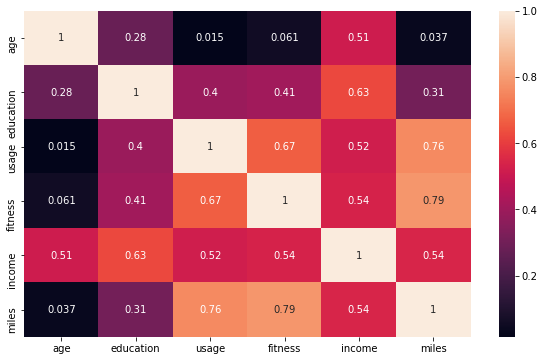

In [39]:
sns.heatmap(df.corr(), annot=True)

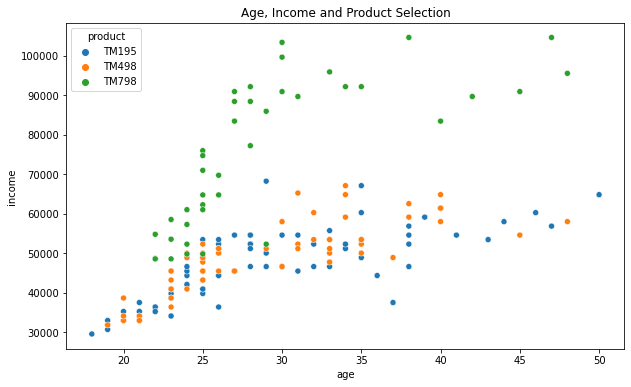

In [41]:
# scatter plot age and income
ax = sns.scatterplot(x = 'age', y = 'income', data = df, hue = 'product')
ax.set_title("Age, Income and Product Selection");

Observation

It is clear that people of all age having higher income prefer the TM798 product. All products are purchased by customers of all ages except the early age group do not purchase TM798

# Answering some questions

1. Which product is preferred by customers having poor to average fitness?

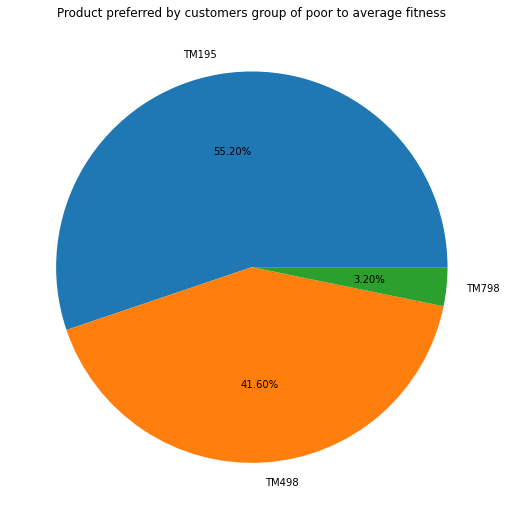

In [47]:
plt.figure(figsize=(10,9))
less_fit_count = df[df['fitness'] <= 3]['product'].value_counts()
plt.title("Product preferred by customers group of poor to average fitness")
plt.pie(less_fit_count, labels = less_fit_count.index, autopct = "%1.2f%%");

2. Which product is preferred by customers expected to use for less than 100 miles?

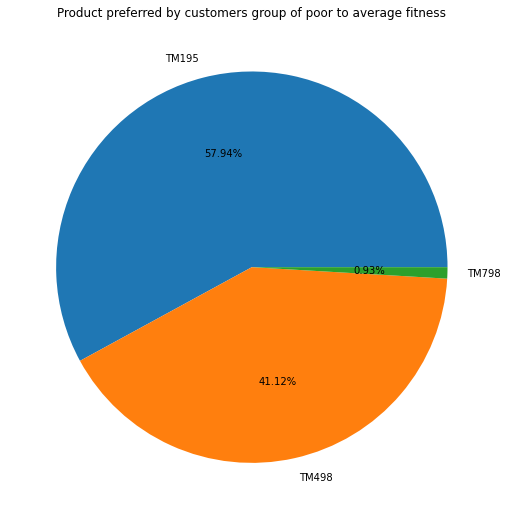

In [61]:
plt.figure(figsize=(10,9))
less_fit_count = df[df['miles'] < 100]['product'].value_counts()
plt.title("Product preferred by customers group of poor to average fitness")
plt.pie(less_fit_count, labels = less_fit_count.index, autopct = "%1.2f%%");

3. Customers having annual income less than 45000 dollar prefer which product?

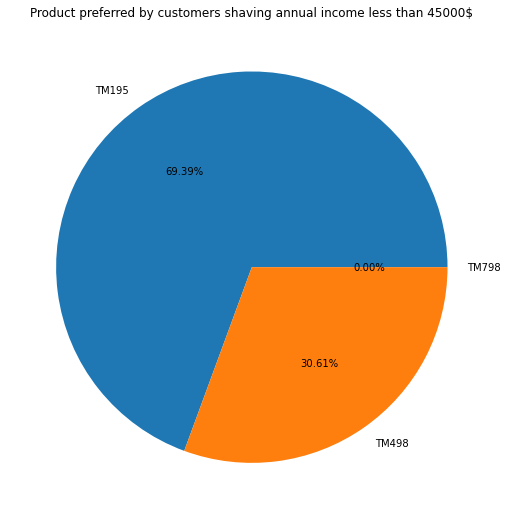

In [62]:
plt.figure(figsize=(10,9))
less_miles_count = df[df['income'] < 45000]['product'].value_counts()
plt.title("Product preferred by customers shaving annual income less than 45000$")
plt.pie(less_miles_count, labels = less_miles_count.index, autopct = "%1.2f%%");

4. How is the product preference of mid income users(45000 - 70000) compared to all users who bought that product?

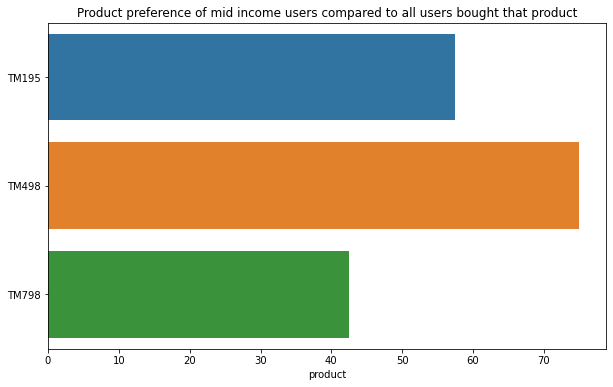

In [71]:
mid_income_perc = df[(df['income'] < 70000) & ( df['income'] > 45000)]['product'].value_counts()*100/df['product'].value_counts()
plt.title('Product preference of mid income users compared to all users bought that product')
sns.barplot(x = mid_income_perc, y = mid_income_perc.index);

5. How is the love for a product for customers aiming average workout(80-150) compared to all customers bought that product?

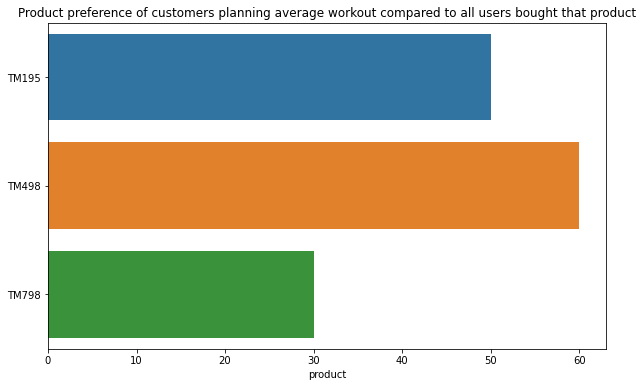

In [73]:
avg_workout_perc = df[(df['miles'] < 150) & (df['miles'] > 80)]['product'].value_counts()*100 / df['product'].value_counts()
plt.title('Product preference of customers planning average workout compared to all users bought that product')
sns.barplot(x = avg_workout_perc, y = avg_workout_perc.index);

6. How values of income, usage, miles etc of females who bought TM798 are different from the values for all females customers?

In [77]:
print("All female variable mean values")
print(df[df['gender'] == 'Female'].mean())
print("Female who bought TM798 - variable mean values")
print(df[(df['product'] == 'TM798') & (df['gender'] == 'Female')].mean())

All female variable mean values
age             28.565789
education       15.394737
usage            3.184211
fitness          3.026316
income       49828.907895
miles           90.013158
dtype: float64
Female who bought TM798 - variable mean values
age             27.000000
education       17.857143
usage            5.000000
fitness          4.571429
income       73633.857143
miles          180.000000
dtype: float64


It can be seen that females who bought TM798 have higher income, expected to run/walk more miles and are more fit.

Conclusions

1. Customers with excellent fitness who anticipate to use the device more frequently each week and over longer distances are interested in purchasing the TM798.
2. Customers with a larger yearly income, independent of their age or other characteristics, prefer to purchase TM798.
3. Customers' marital status, age, and gender were not found to be influencing variables in product selection.
4. Relation between fitness, usage and miles is observed.
5. Despite the fact that the client bases for goods TM195 and TM498 are comparable, the vast majority of individuals who purchased TM498 are middle-income and intend to conduct a medium workout.
